In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)

In [ ]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [ ]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
# Step function
def step(z):
    return 1 if z > 0 else 0

# Perceptron algorithm
def perceptron(X, y, lr=0.1, epochs=10):

    X = np.insert(X, 0, 1, axis=1)  # Insert 1 at index 0 for bias
    weights = np.ones(X.shape[1])    # Initialize weights to 1

    for _ in range(epochs):
        # Randomly select a data point
        j = np.random.randint(0, X.shape[0])
        # Compute the weighted sum
        z = np.dot(X[j], weights)
        # Apply activation function
        y_hat = step(z)
        # Update weights based on prediction error
        weights += lr * (y[j] - y_hat) * X[j]

    # Return bias and coefficients separately
    return weights[0],weights[1:]

Coefficients: [1.07393922 0.83655736]
Intercept: 1.0


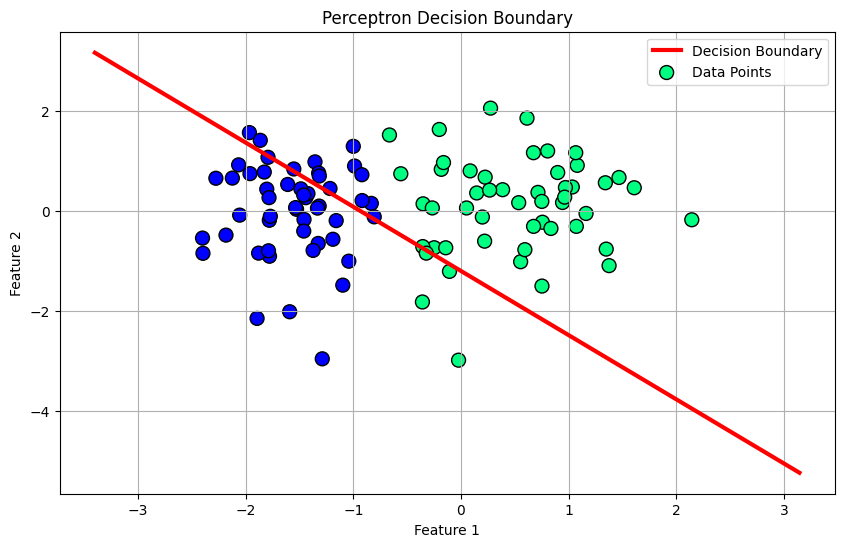

In [ ]:
# Train perceptron
intercept_, coef_ = perceptron(X, y)

# Display learned coefficients and intercept
print("Coefficients:", coef_)
print("Intercept:", intercept_)

# Compute slope (m) and y-intercept (b) for the decision boundary
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Generate points for plotting the decision boundary
x_input = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
y_input = m * x_input + b

# Plotting
plt.figure(figsize=(10, 6))
# Plot decision boundary
plt.plot(x_input, y_input, color='red', linewidth=3, label='Decision Boundary')
# Plot data points
plt.scatter(
    X[:, 0], X[:, 1],
    c=y, cmap='winter', s=100,
    edgecolor='k', label='Data Points'
)
# Add labels and limits
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('placement.csv')

In [ ]:
print(df.shape)
df.head()

(100, 3)


cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1

<Axes: xlabel='cgpa', ylabel='resume_score'>

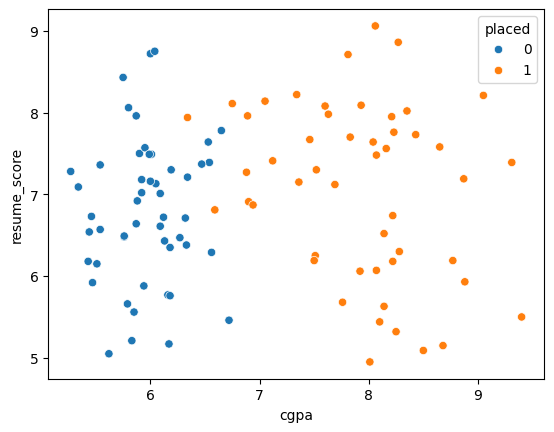

In [ ]:
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [ ]:
p.fit(X,y)

Perceptron()

In [ ]:
p.coef_

array([[ 40.26, -36.  ]])

In [ ]:
p.intercept_

array([-25.])

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

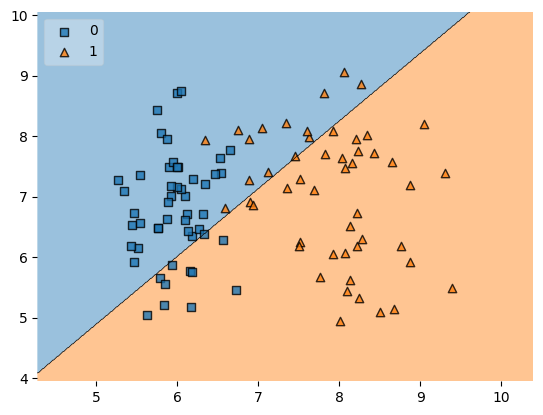

In [ ]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)

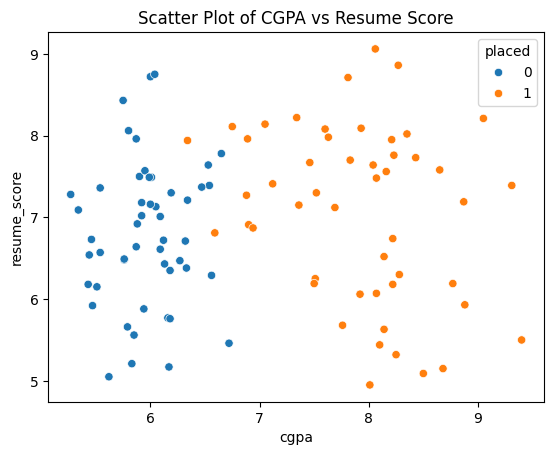

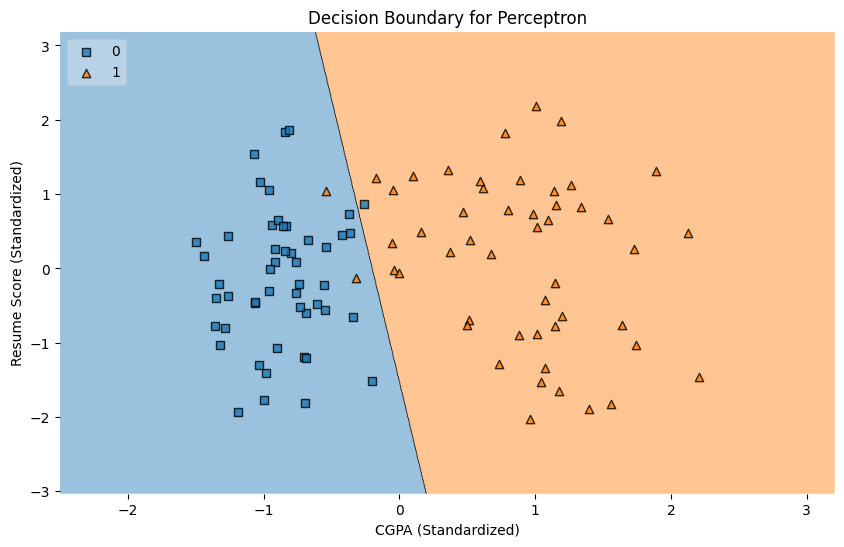

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions

# Load the dataset
df = pd.read_csv('placement.csv')

# Visualize the data
sns.scatterplot(x='cgpa', y='resume_score', hue='placed', data=df)
plt.title("Scatter Plot of CGPA vs Resume Score")
plt.show()

# Define features and target
X = df[['cgpa', 'resume_score']].values  # Features
y = df['placed'].values  # Target

# Standardize features for Perceptron
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the Perceptron
p = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
p.fit(X, y)

# Visualize decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=p, legend=2)
plt.xlabel('CGPA (Standardized)')
plt.ylabel('Resume Score (Standardized)')
plt.title('Decision Boundary for Perceptron')
plt.show()


Accuracy: 84.00%


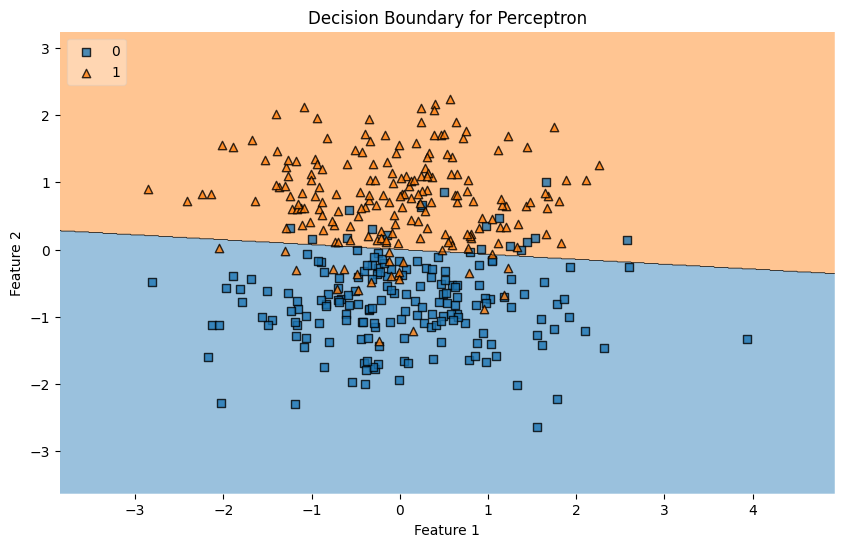

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Generate dataset with more features
X, y = make_classification(n_samples=500, n_features=10, n_informative=2,
                            n_redundant=2, n_classes=2, random_state=42)

# Use only two features for visualization
X = X[:, :2]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Perceptron model
model = Perceptron(max_iter=1000, tol=1e-2, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Combine training and test data for visualization
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.title("Decision Boundary for Perceptron")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Dataset: Non-Linearly Separable Data (Moons)
Accuracy: 82.40%



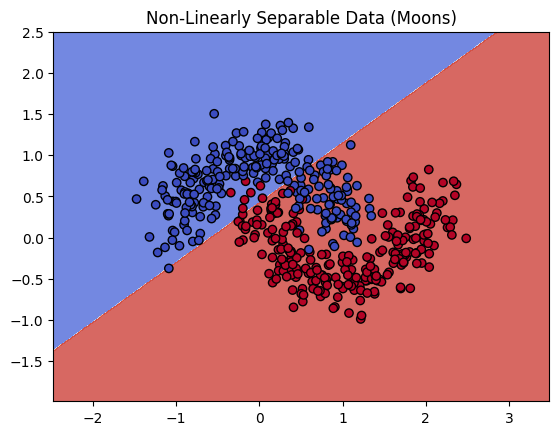

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate non-linearly separable data (moons)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron
model = Perceptron(max_iter=1000, tol=1e-2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dataset: Non-Linearly Separable Data (Moons)\nAccuracy: {accuracy * 100:.2f}%\n")

# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Non-Linearly Separable Data (Moons)")
plt.show()


Dataset: Non-Linearly Separable Data (circles)
Accuracy: 50.40%



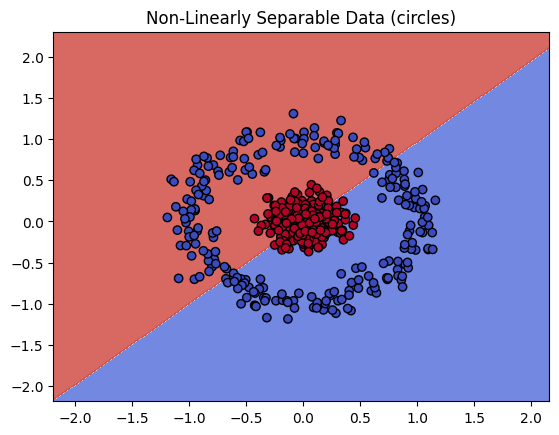

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Generate non-linearly separable data (circles)
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Perceptron
model = Perceptron(max_iter=1000, tol=1e-2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dataset: Non-Linearly Separable Data (circles)\nAccuracy: {accuracy * 100:.2f}%\n")

# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title("Non-Linearly Separable Data (circles)")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Linearly Separable Data
Perceptron Accuracy: 88.00%
MLP Accuracy: 96.00%

Perceptron Decision Boundary:


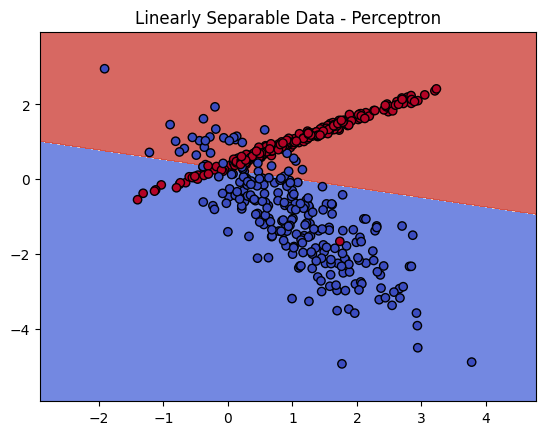

MLP Decision Boundary:


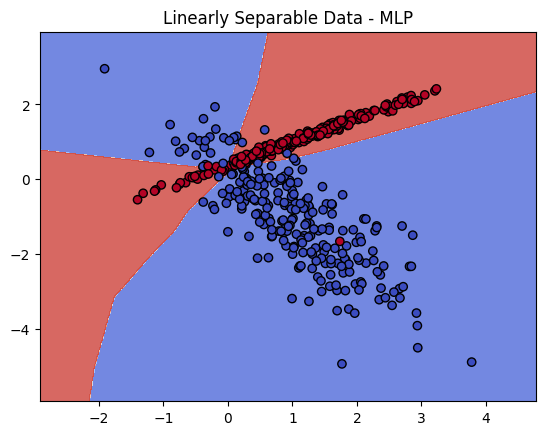

Dataset: Non-Linearly Separable Data (Moons)
Perceptron Accuracy: 82.40%
MLP Accuracy: 98.40%

Perceptron Decision Boundary:


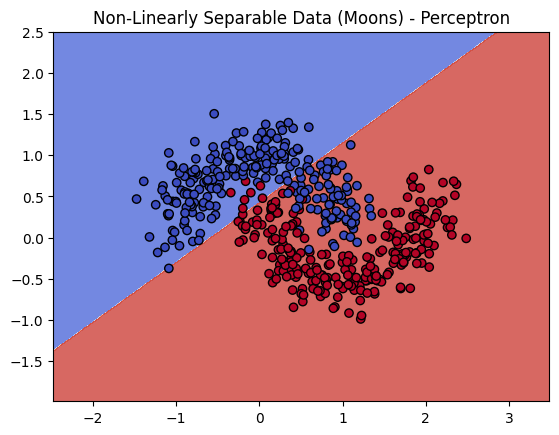

MLP Decision Boundary:


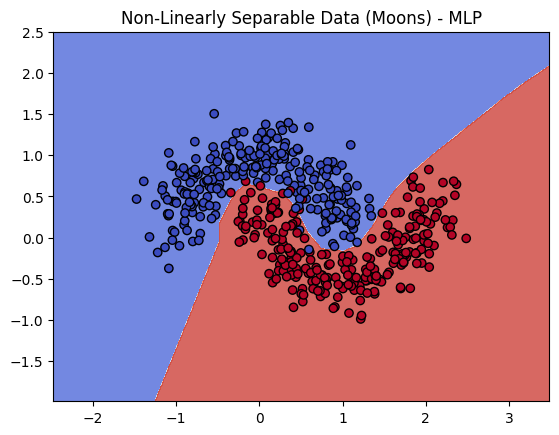

Dataset: Non-Linearly Separable Data (Circles)
Perceptron Accuracy: 43.20%
MLP Accuracy: 84.00%

Perceptron Decision Boundary:


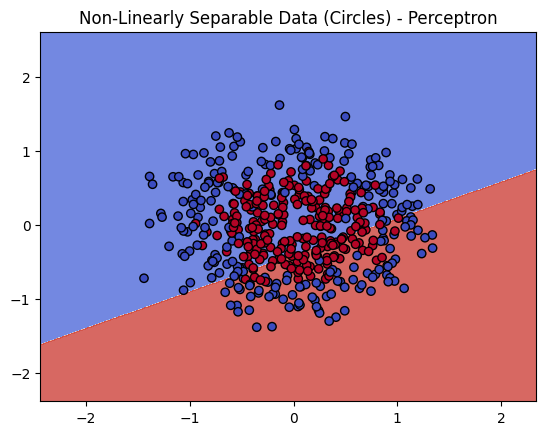

MLP Decision Boundary:


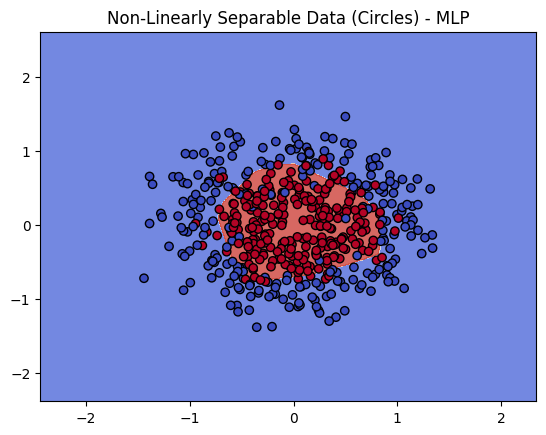

Dataset: Higher-Dimensional Linearly Separable Data
Perceptron Accuracy: 46.40%
MLP Accuracy: 68.00%

Perceptron Decision Boundary:


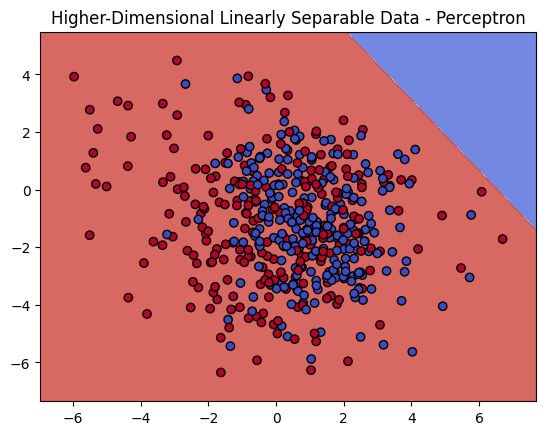

MLP Decision Boundary:


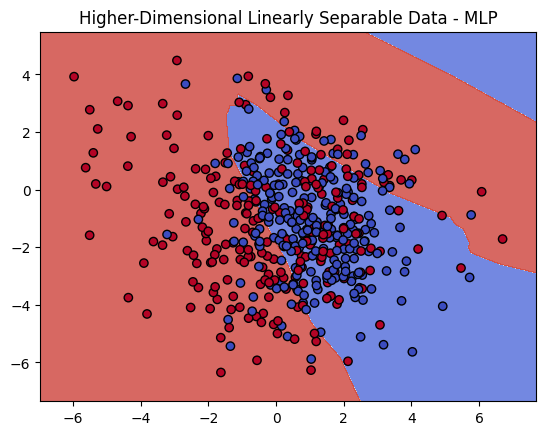

In [ ]:
# ALL 4 CASES IN ONE WITH NO ACTIVATION FUNCTION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 1: Linearly separable data
X1, y1 = make_classification(n_samples=500, n_features=2, n_informative=2,
                              n_redundant=0, n_clusters_per_class=1, random_state=42)
evaluate_models(X1, y1, "Linearly Separable Data")

# Case 2: Non-linearly separable data (moons)
X2, y2 = make_moons(n_samples=500, noise=0.2, random_state=42)
evaluate_models(X2, y2, "Non-Linearly Separable Data (Moons)")

# Case 3: Non-linearly separable data (circles)
X3, y3 = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)
evaluate_models(X3, y3, "Non-Linearly Separable Data (Circles)")

# Case 4: Higher-dimensional linearly separable data
X4, y4 = make_classification(n_samples=500, n_features=10, n_informative=8,
                              n_redundant=2, random_state=42)
evaluate_models(X4[:, :2], y4, "Higher-Dimensional Linearly Separable Data")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Linearly Separable Data
Perceptron Accuracy: 88.00%
MLP Accuracy: 94.40%

Perceptron Decision Boundary:


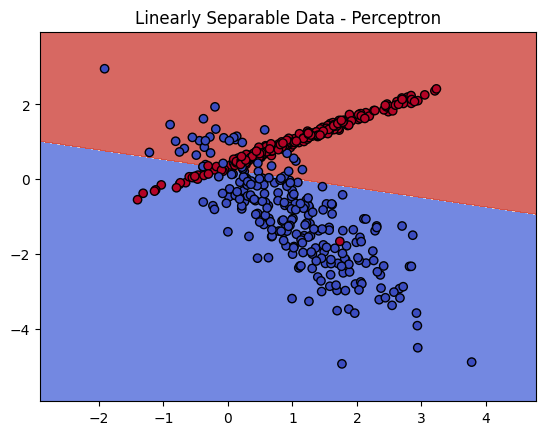

MLP Decision Boundary:


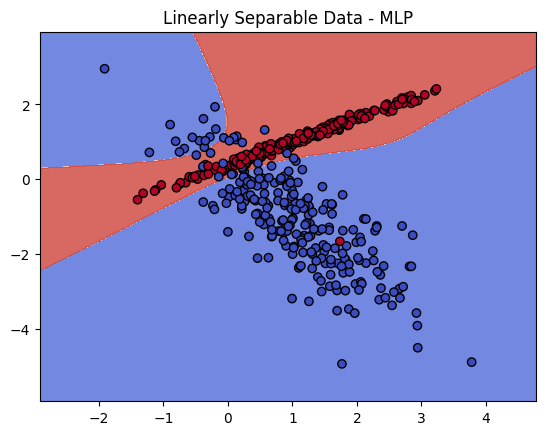

In [ ]:
# Case 1 using Tan h
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='tanh')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 1: Linearly separable data
X1, y1 = make_classification(n_samples=500, n_features=2, n_informative=2,
                              n_redundant=0, n_clusters_per_class=1, random_state=42)
evaluate_models(X1, y1, "Linearly Separable Data")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: Linearly Separable Data
Perceptron Accuracy: 88.00%
MLP Accuracy: 96.00%

Perceptron Decision Boundary:


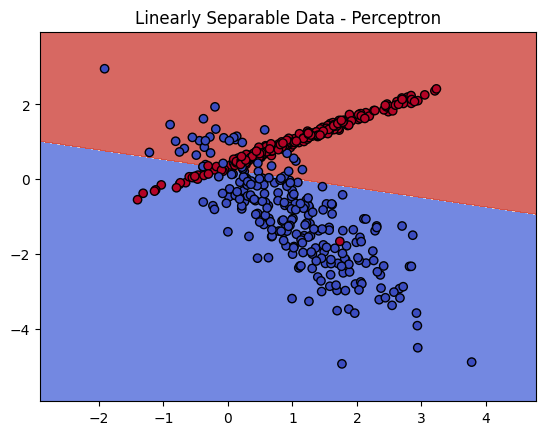

MLP Decision Boundary:


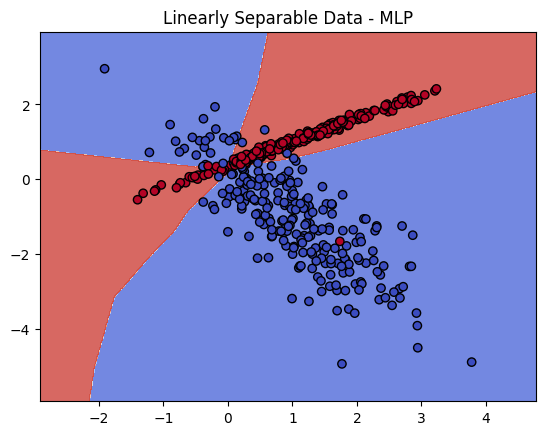

In [ ]:
# Case 1 using ReLU
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='relu')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 1: Linearly separable data
X1, y1 = make_classification(n_samples=500, n_features=2, n_informative=2,
                              n_redundant=0, n_clusters_per_class=1, random_state=42)
evaluate_models(X1, y1, "Linearly Separable Data")


Dataset: Non-Linearly Separable Data (Moons)
Perceptron Accuracy: 82.40%
MLP Accuracy: 99.20%

Perceptron Decision Boundary:


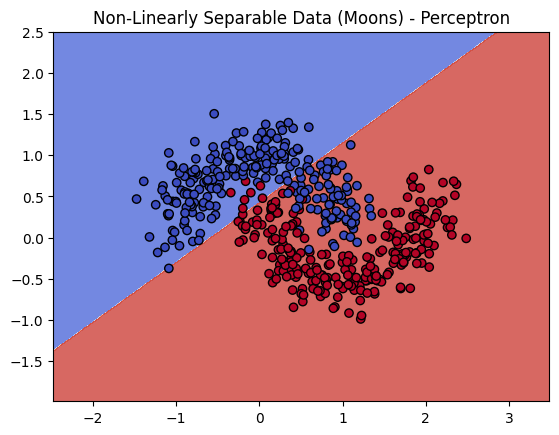

MLP Decision Boundary:


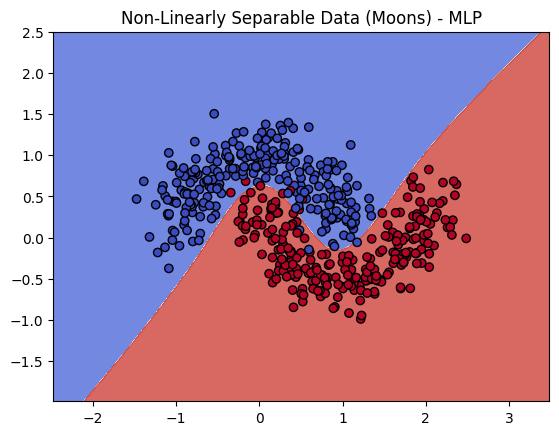

In [ ]:
#Case 2 using tan h
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='tanh')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 2: Non-linearly separable data (moons)
X2, y2 = make_moons(n_samples=500, noise=0.2, random_state=42)
evaluate_models(X2, y2, "Non-Linearly Separable Data (Moons)")

Dataset: Non-Linearly Separable Data (Moons)
Perceptron Accuracy: 82.40%
MLP Accuracy: 98.40%

Perceptron Decision Boundary:


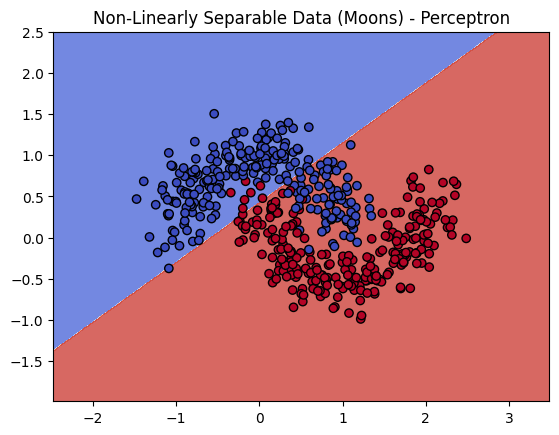

MLP Decision Boundary:


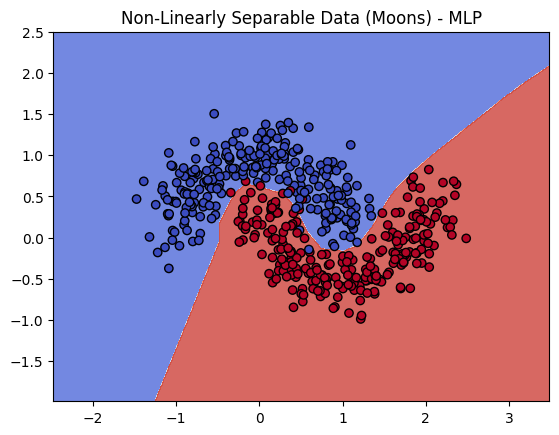

In [ ]:
#Case 2 using ReLU
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='relu')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 2: Non-linearly separable data (moons)
X2, y2 = make_moons(n_samples=500, noise=0.2, random_state=42)
evaluate_models(X2, y2, "Non-Linearly Separable Data (Moons)")

Dataset: Non-Linearly Separable Data (Circles)
Perceptron Accuracy: 43.20%
MLP Accuracy: 86.40%

Perceptron Decision Boundary:


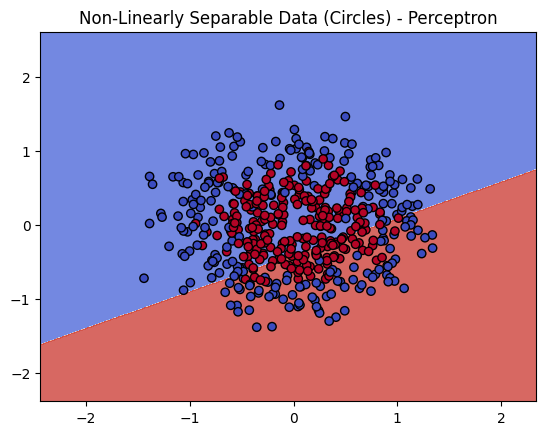

MLP Decision Boundary:


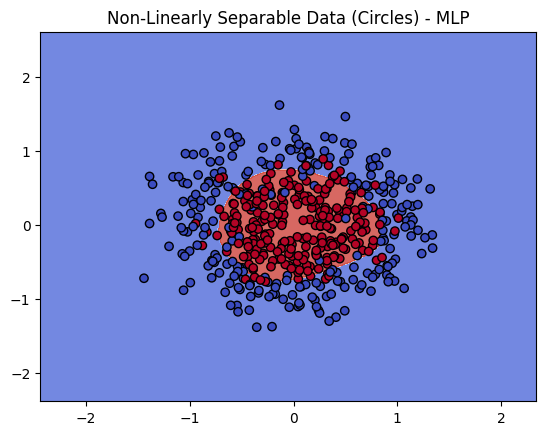

In [ ]:
# Case 3 using tanh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='tanh')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")


# Case 3: Non-linearly separable data (circles)
X3, y3 = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)
evaluate_models(X3, y3, "Non-Linearly Separable Data (Circles)")

Dataset: Non-Linearly Separable Data (Circles)
Perceptron Accuracy: 43.20%
MLP Accuracy: 84.00%

Perceptron Decision Boundary:


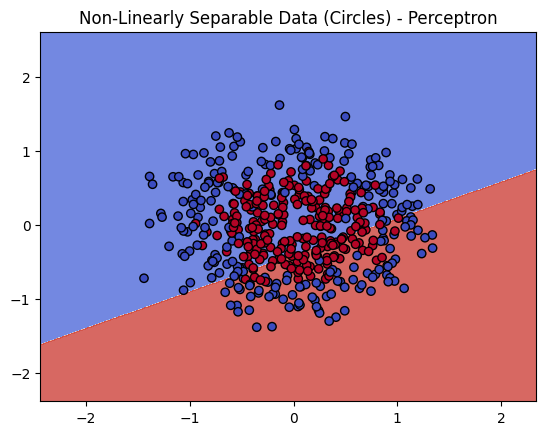

MLP Decision Boundary:


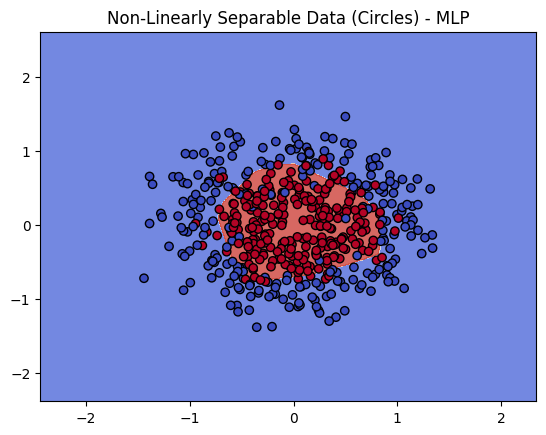

In [ ]:
# Case 3 using ReLU
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='relu')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")


# Case 3: Non-linearly separable data (circles)
X3, y3 = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)
evaluate_models(X3, y3, "Non-Linearly Separable Data (Circles)")

Dataset: Higher-Dimensional Linearly Separable Data
Perceptron Accuracy: 46.40%
MLP Accuracy: 72.80%

Perceptron Decision Boundary:


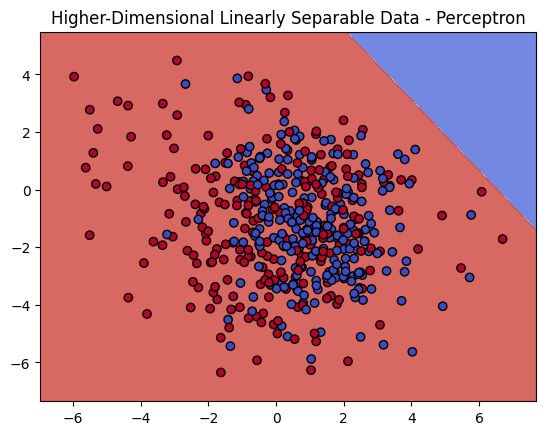

MLP Decision Boundary:


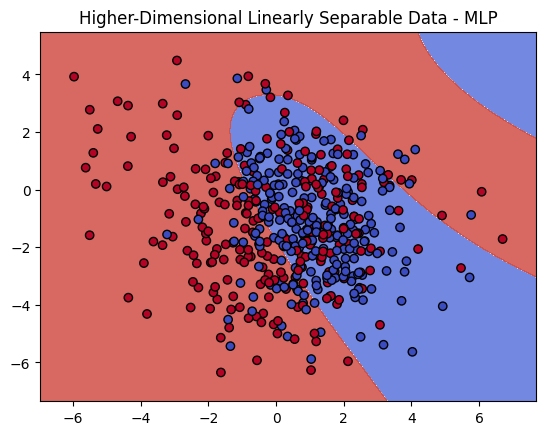

In [ ]:
# Case 4 using tanh
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='tanh')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 4: Higher-dimensional linearly separable data
X4, y4 = make_classification(n_samples=500, n_features=10, n_informative=8,
                              n_redundant=2, random_state=42)
evaluate_models(X4[:, :2], y4, "Higher-Dimensional Linearly Separable Data")


Dataset: Higher-Dimensional Linearly Separable Data
Perceptron Accuracy: 46.40%
MLP Accuracy: 68.00%

Perceptron Decision Boundary:


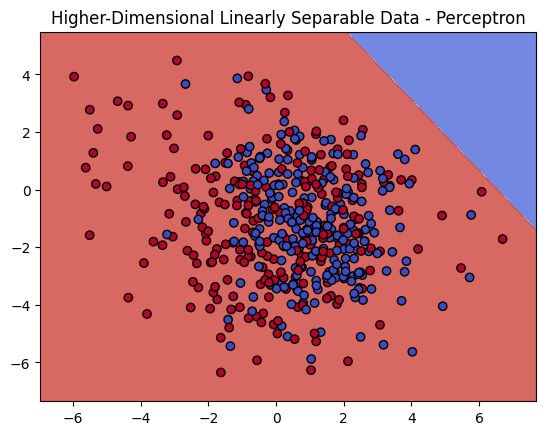

MLP Decision Boundary:


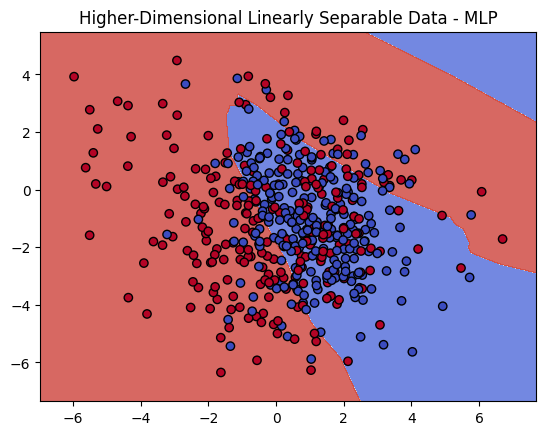

In [ ]:
# Case 4 using ReLU
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Helper function to evaluate models
def evaluate_models(X, y, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train Perceptron
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred_p = perceptron.predict(X_test)
    accuracy_p = accuracy_score(y_test, y_pred_p)

    # Train Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, activation='relu')
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Plot decision boundaries
    def plot_decision_boundary(X, y, model, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
        plt.title(title)
        plt.show()

    print(f"Dataset: {title}")
    print(f"Perceptron Accuracy: {accuracy_p * 100:.2f}%")
    print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%\n")

    print("Perceptron Decision Boundary:")
    plot_decision_boundary(X, y, perceptron, title + " - Perceptron")
    print("MLP Decision Boundary:")
    plot_decision_boundary(X, y, mlp, title + " - MLP")

# Case 4: Higher-dimensional linearly separable data
X4, y4 = make_classification(n_samples=500, n_features=10, n_informative=8,
                              n_redundant=2, random_state=42)
evaluate_models(X4[:, :2], y4, "Higher-Dimensional Linearly Separable Data")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7526 - loss: 0.5652 - val_accuracy: 0.8720 - val_loss: 0.3040
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8824 - loss: 0.2845 - val_accuracy: 0.8400 - val_loss: 0.3004
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8567 - loss: 0.2610 - val_accuracy: 0.8480 - val_loss: 0.2784
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8805 - loss: 0.2418 - val_accuracy: 0.8720 - val_loss: 0.2568
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9144 - loss: 0.2099 - val_accuracy: 0.8960 - val_loss: 0.2354
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9059 - loss: 0.2061 - val_accuracy: 0.9360 - val_loss: 0.1942
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9170 - loss: 0.1863 - val_accuracy: 0.9200 - val_loss: 0.1731
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.1483 - val_accuracy: 0.9680 - val_los

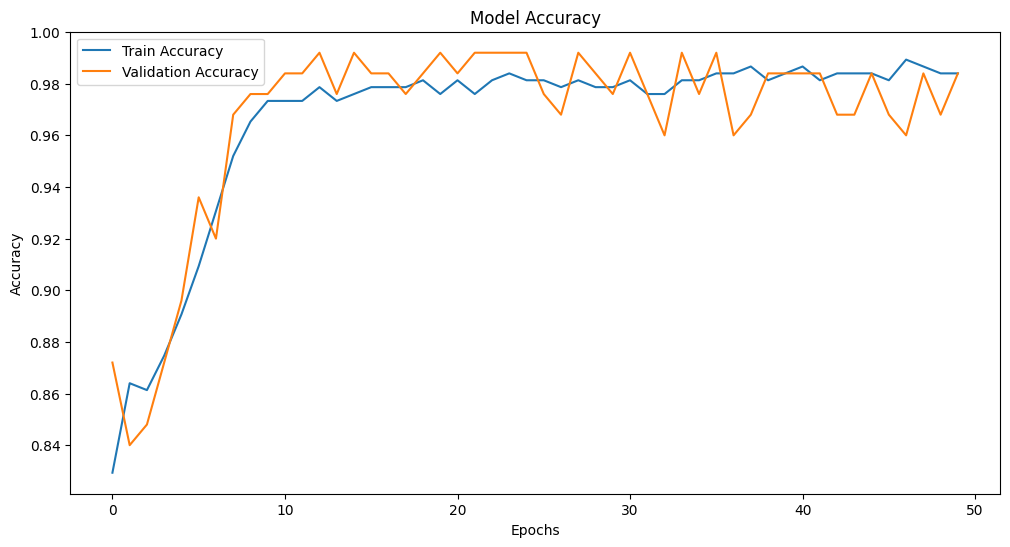

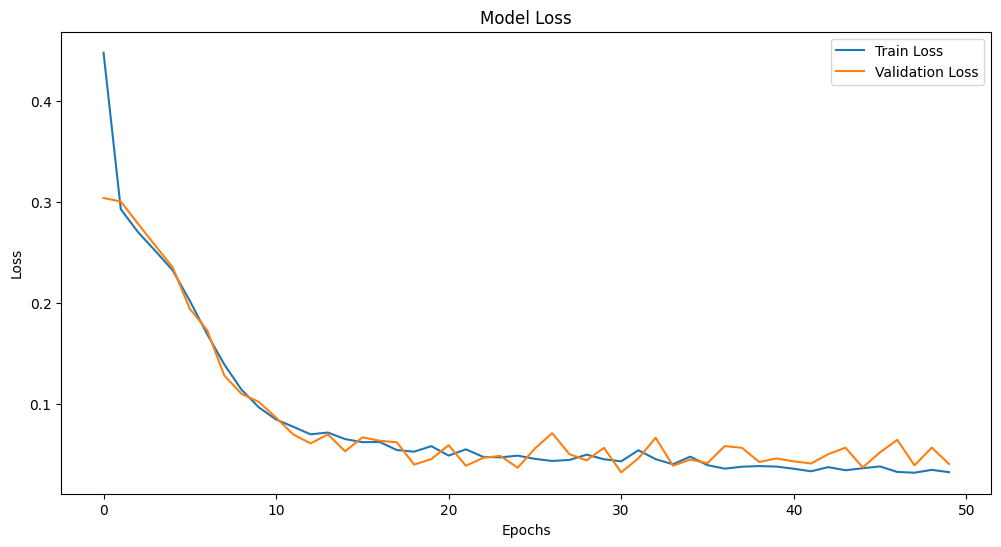

8396/8396 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


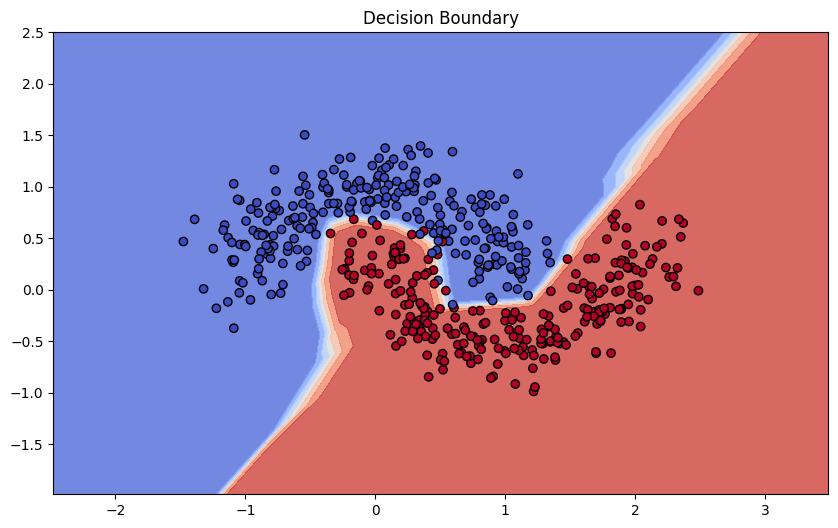

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Generate make_moons dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title('Decision Boundary')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
# Replace 'housing.csv' with the path to your dataset
data = pd.read_csv('BostonHousing.csv')

# # Display basic information about the dataset
# print(data.info())
# print(data.describe())

# # Check for missing values
# print("\nMissing values in each column:\n", data.isnull().sum())

# Compute correlation matrix
correlation_matrix = data.corr()

# Display correlations with the target variable ('medv')
print("\nCorrelations with target (medv):\n", correlation_matrix['medv'].sort_values(ascending=False))


Correlations with target (medv):
 medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


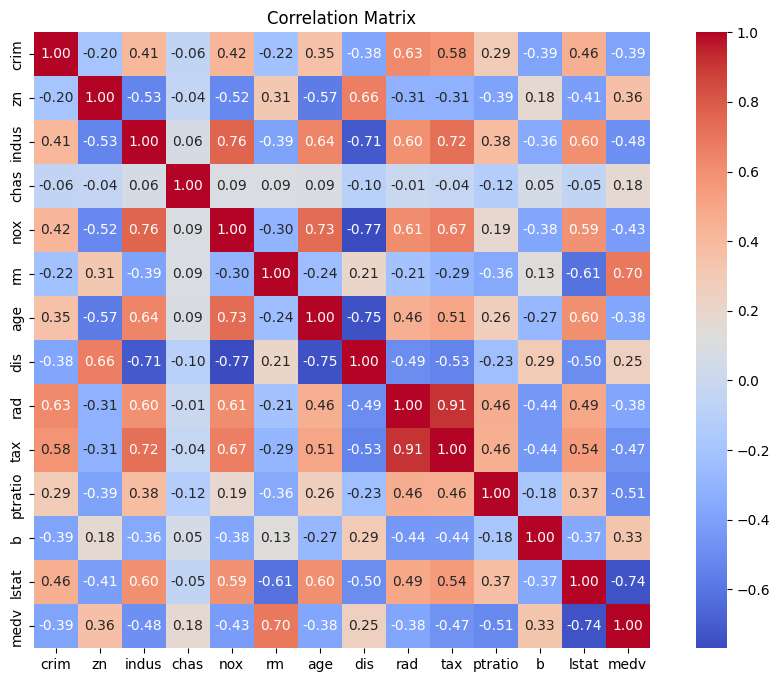

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Identify features strongly correlated with 'medv' (absolute value > 0.5)
strong_corr_features = correlation_matrix['medv'][abs(correlation_matrix['medv']) > 0.5]
print("\nStrongly correlated features with 'medv':\n", strong_corr_features)


Strongly correlated features with 'medv':
 rm         0.695360
ptratio   -0.507787
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 646.5883 - mean_absolute_error: 23.1207 - val_loss: 537.0154 - val_mean_absolute_error: 21.5988
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 538.7562 - mean_absolute_error: 21.3626 - val_loss: 493.1320 - val_mean_absolute_error: 20.5881
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 516.4560 - mean_absolute_error: 20.6435 - val_loss: 427.8626 - val_mean_absolute_error: 18.9883
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 479.7422 - mean_absolute_error: 19.5694 - val_loss: 334.7924 - val_mean_absolute_error: 16.6122
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 378.7014 - mean_absolute_error: 17.1658 - val_loss: 220.5773 - val_mean_absolute_error: 13.2908
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 213.8283 - mean_absolute_error: 12.5611 - val_loss: 114.2451 - val_mean_absolute_error: 9.1634
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.0350 - mean_absolut

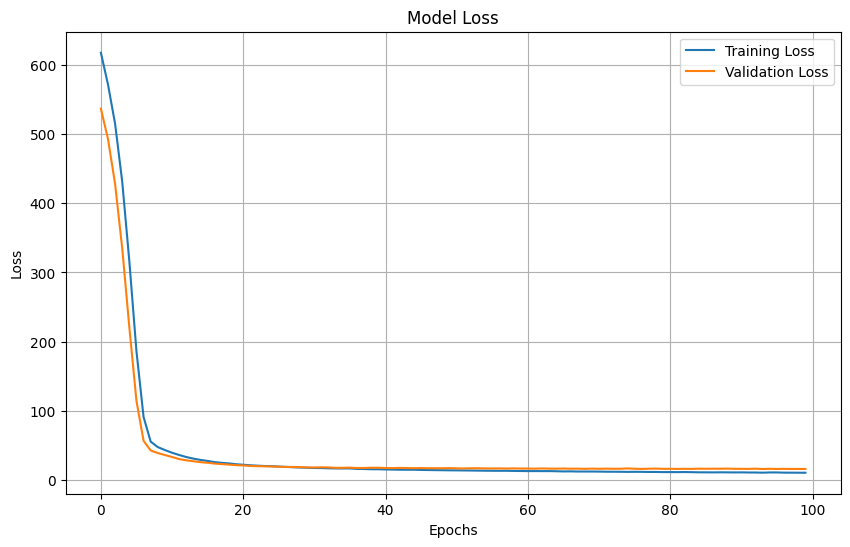

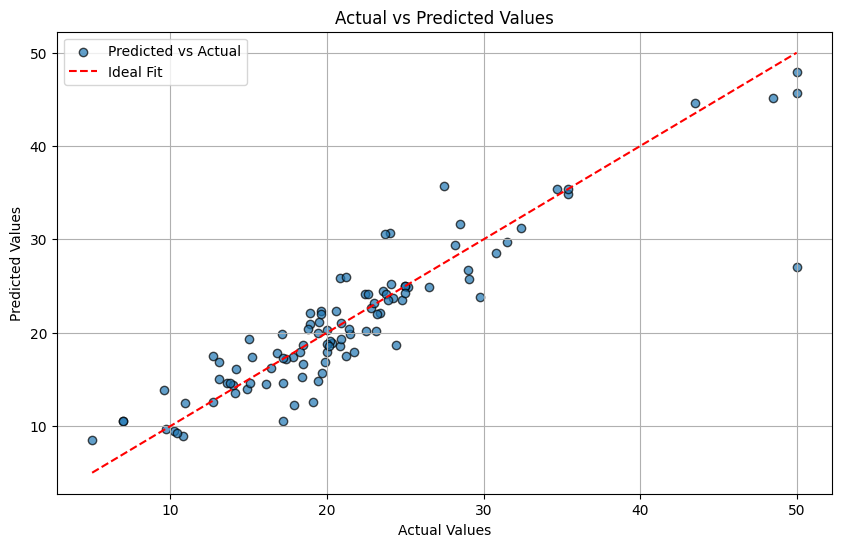

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Select features based on correlation with medv
selected_features = ['rm', 'lstat', 'ptratio', 'tax', 'nox']  # Adjust based on analysis
X = data[selected_features].values
y = data['medv'].values  # Target variable for regression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.2f}")

# Predict and evaluate
y_pred = model.predict(X_test).flatten()
print("\nMean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4283 - loss: 0.8389 - val_accuracy: 0.8037 - val_loss: 0.4755
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4754 - val_accuracy: 0.8194 - val_loss: 0.4165
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8260 - loss: 0.4154 - val_accuracy: 0.8419 - val_loss: 0.3934
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - loss: 0.3957 - val_accuracy: 0.8494 - val_loss: 0.3770
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.3735 - val_accuracy: 0.8512 - val_loss: 0.3648
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3554 - val_accuracy: 0.8531 - val_loss: 0.3568
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8632 - loss: 0.3426 - val_accuracy: 0.8562 - val_loss: 0.3525
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.3454 - val_accuracy: 0.8575 - val_

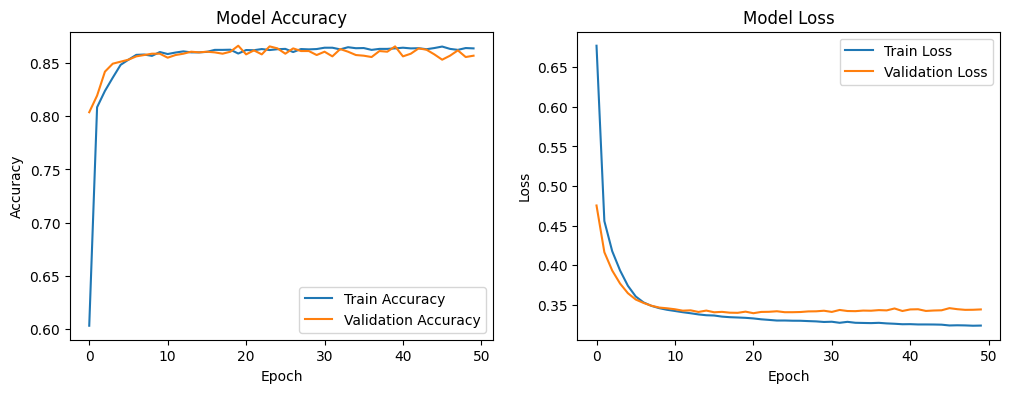

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
file_path = '/content/Churn_Modelling.csv'
df = pd.read_csv(file_path)

# Features and target
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# Preprocessing: One-hot encode categorical variables and scale numerical variables
categorical_features = ['Geography', 'Gender']
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

X = preprocessor.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on new data (example)
new_data = np.array([['France', 'Male', 650, 1, 0, 45, 3, 0, 1, 50000]])  # Example data with categorical features
# The new data needs to be in a pandas DataFrame for the ColumnTransformer to work correctly
new_data = pd.DataFrame(new_data, columns=['Geography', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])
new_data = preprocessor.transform(new_data)
prediction = model.predict(new_data)
print(f"Churn Probability: {prediction[0][0]:.2f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 19698.4688 - mae: 106.4386 - val_loss: 17630.0508 - val_mae: 99.4117
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17722.2129 - mae: 100.8279 - val_loss: 15857.9404 - val_mae: 93.2526
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15021.3633 - mae: 89.1824 - val_loss: 12519.2461 - val_mae: 80.6461
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11381.1846 - mae: 76.2154 - val_loss: 7925.2588 - val_mae: 60.9270
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6646.2988 - mae: 55.0651 - val_loss: 3780.2590 - val_mae: 41.9838
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3284.7944 - mae: 39.9319 - val_loss: 1725.0569 - val_mae: 33.8602
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1778.9395 - mae: 34.6559 - val_loss: 1386.0409 - val_mae: 33.7041
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1375.3226 - mae: 32.7349 - val_loss: 1353.9581 - val_mae

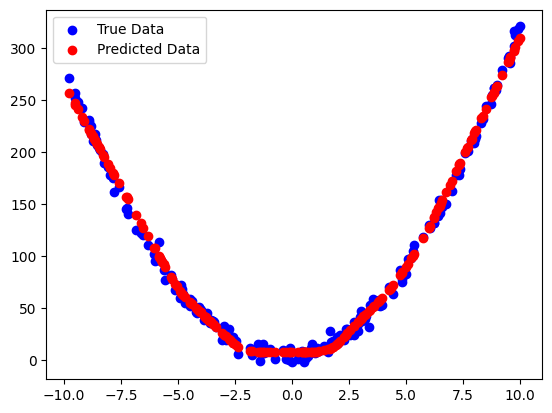

In [ ]:
#PROPER REGRESSION PROBLEM WITH TIME-SERIES
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)
X = np.linspace(-10, 10, 1000).reshape(-1, 1)  # Features
y = 3 * X**2 + 2 * X + 5 + np.random.normal(0, 5, size=X.shape)  # Target with noise

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Step 4: Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Step 6: Evaluate the Model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae:.2f}")

# Step 7: Visualize Results
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='True Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('BreastCancer.csv')

data.describe()
data.info()
correlation_matrix = data.corr()
print("\nCorrelations with target (Class):\n", correlation_matrix['Class'].sort_values(ascending=False))

# Identify features strongly correlated with 'Class' (absolute value > 0.5)
strong_corr_features = correlation_matrix['Class'][abs(correlation_matrix['Class']) > 0.5]
print("\nStrongly correlated features with 'Class':\n", strong_corr_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB

Correlations with target (Class):
 Class              1.000000
Bare.nuclei        0.822696
Cell.shape         0.818934
Cell.size          0.817904
Bl.cromatin        0.756616
Cl.thickness       0.716001
Normal.nucleoli    0.712244
Marg.adhesion

Epoch 1/100


<ipython-input-50-a62ba9dc3a88>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bare.nuclei'].fillna(data['Bare.nuclei'].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.3466 - loss: 0.2563 - val_accuracy: 0.6327 - val_loss: 0.2380
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6987 - loss: 0.2313 - val_accuracy: 0.7755 - val_loss: 0.2175
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8385 - loss: 0.2085 - val_accuracy: 0.8776 - val_loss: 0.1989
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9001 - loss: 0.1877 - val_accuracy: 0.9286 - val_loss: 0.1829
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9246 - loss: 0.1725 - val_accuracy: 0.9388 - val_loss: 0.1682
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9459 - loss: 0.1516 - val_accuracy: 0.9388 - val_loss: 0.1544
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9546 - loss: 0.1393 - val_accuracy: 0.9286 - val_loss: 0.1417
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9438 - loss: 0.1336 - val_accuracy: 0.9286 - val_loss: 0.1294
Epoc

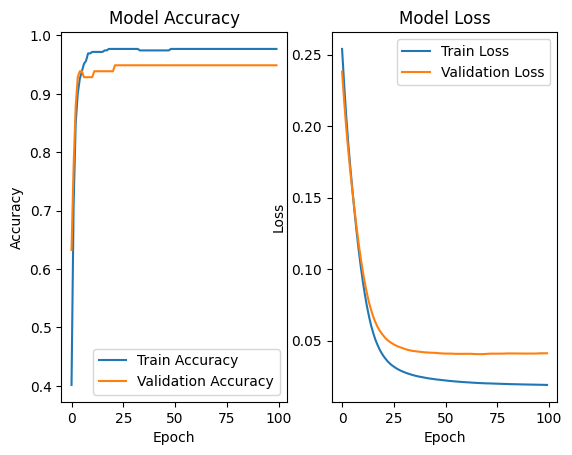

In [ ]:
# MY CODE FOR BREAST CANCER PROBLEM DATASET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
data = pd.read_csv('BreastCancer.csv')

# Select features based on correlation
data['Bare.nuclei'].fillna(data['Bare.nuclei'].median(), inplace=True)
selected_features = ['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion', 'Epith.c.size', 'Bl.cromatin', 'Normal.nucleoli','Bare.nuclei']  # Adjust based on analysis
X = data[selected_features].values
y = data['Class'].values  # Target variable for regression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the deep learning model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0068 - loss: 1.2535 - val_accuracy: 0.0909 - val_loss: 0.9156
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0993 - loss: 0.8478 - val_accuracy: 0.5636 - val_loss: 0.6398
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8479 - loss: 0.6035 - val_accuracy: 0.9818 - val_loss: 0.4255
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.4154 - val_accuracy: 1.0000 - val_loss: 0.2749
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9955 - loss: 0.2737 - val_accuracy: 1.0000 - val_loss: 0.1778
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1870 - val_accuracy: 1.0000 - val_loss: 0.1169
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1251 - val_accuracy: 1.0000 - val_loss: 0.0800
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0889 - val_accuracy: 1.0000 - val_loss: 0.0571
Ep

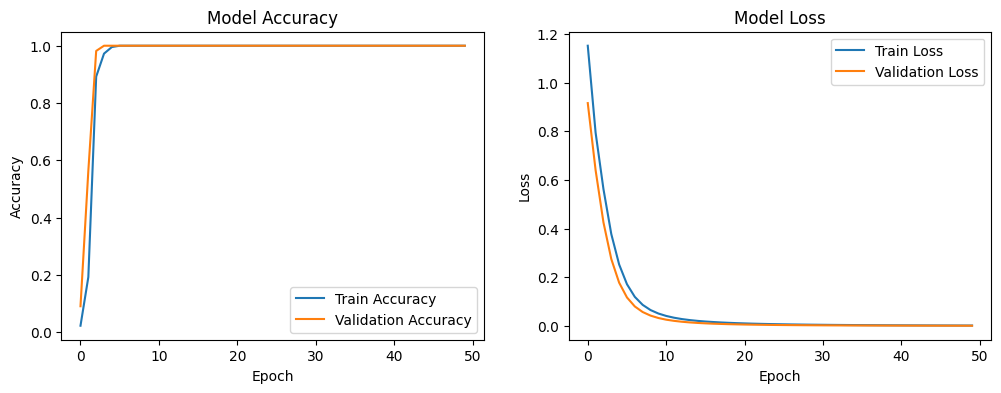

In [ ]:
# SIR's CODE FOR BREAST CANCER PROBLEM DATASET
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
file_path = '/content/BreastCancer.csv'
df = pd.read_csv(file_path)

# Drop the 'Id' column (not relevant for classification)
df = df.drop(columns=['Id'])

# Handle missing or non-numeric values (if present in 'Bare.nuclei')
df['Bare.nuclei'] = pd.to_numeric(df['Bare.nuclei'], errors='coerce')
df = df.dropna()

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Normalize the target to binary classification (e.g., malignant=1, benign=0)
y = y.map(lambda x: 1 if x == 'malignant_class_label' else 0)  # Replace 'malignant_class_label' as per your dataset

# Standardize numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8641 - loss: 0.4623 - val_accuracy: 0.9616 - val_loss: 0.1293
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9650 - loss: 0.1194 - val_accuracy: 0.9678 - val_loss: 0.1077
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9751 - loss: 0.0819 - val_accuracy: 0.9700 - val_loss: 0.1006
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9712 - val_loss: 0.0983
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 0.9744 - val_loss: 0.0965
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9878 - loss: 0.0362 - val_accuracy: 0.9713 - val_loss: 0.1050
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9732 - val_loss: 0.0996
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9931 - loss: 0.02

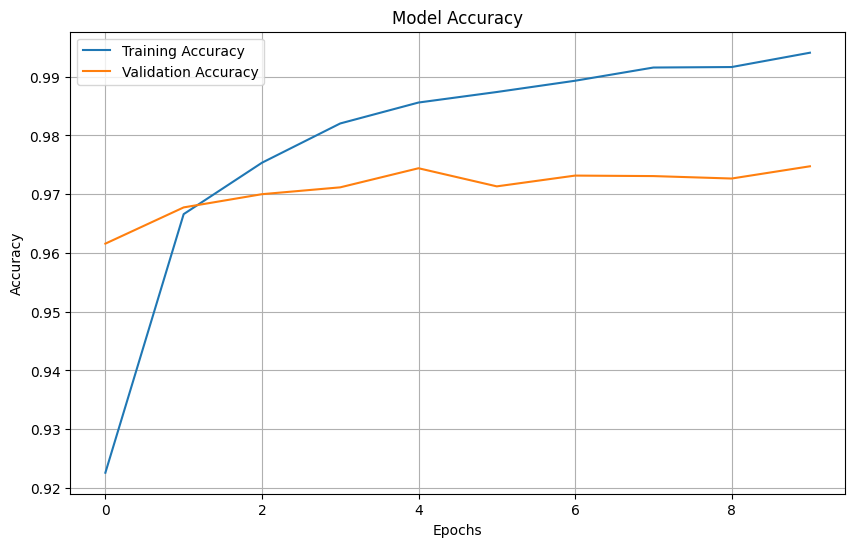

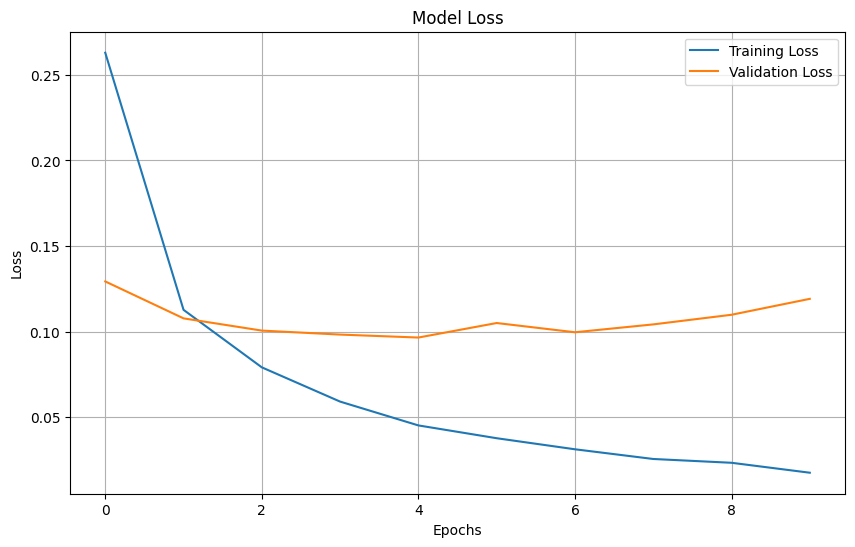

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


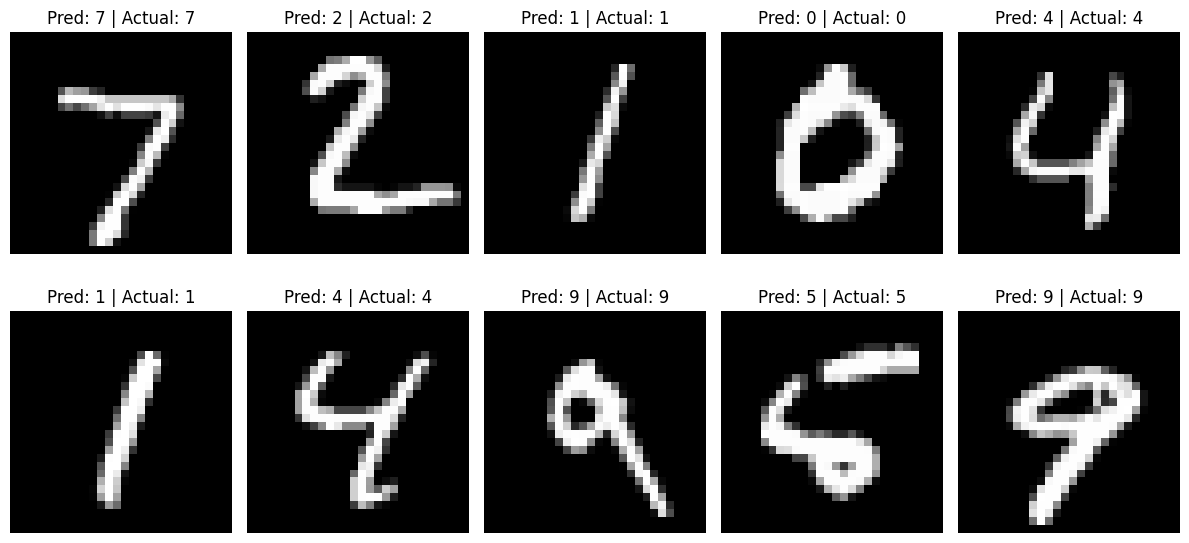

In [ ]:
# MNIST DATASET CLASSIFICATION
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Predict on test data and visualize some predictions
import numpy as np
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

# Visualize first 10 test samples
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]} | Actual: {actual[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2489 - loss: 1.1180 - val_accuracy: 0.0833 - val_loss: 1.0987
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3252 - loss: 1.1001 - val_accuracy: 0.2500 - val_loss: 1.0869
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4273 - loss: 1.0880 - val_accuracy: 0.3333 - val_loss: 1.0763
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4866 - loss: 1.0636 - val_accuracy: 0.4167 - val_loss: 1.0662
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4731 - loss: 1.0708 - val_accuracy: 0.5833 - val_loss: 1.0562
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5670 - loss: 1.0335 - val_accuracy: 0.5833 - val_loss: 1.0457
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5908 - loss: 1.0269 - val_accuracy: 0.6667 - val_loss: 1.0365
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6474 - loss: 1.0195 - val_accuracy: 0.6667 - val_loss: 1.0257
Epoch 9/50
7/7 ━━━

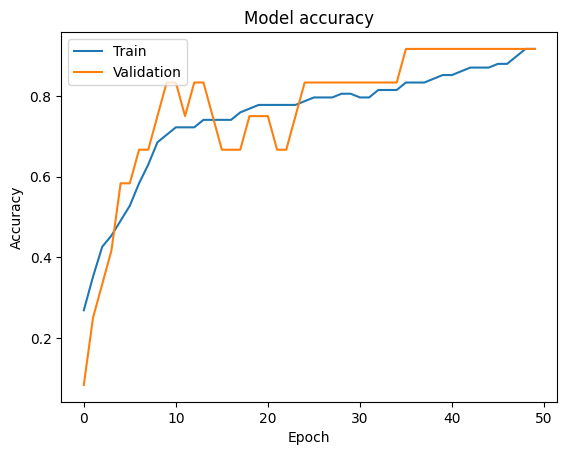

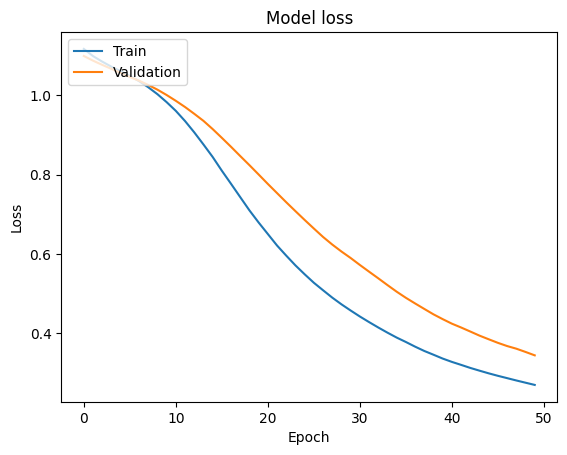

In [ ]:
#IRIS DATASET CLASSIFICATION
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])

print(data.index.dtype)

data.head()

object


ActivePower  AmbientTemperatue  \
2017-12-31 00:00:00+00:00          NaN                NaN   
2017-12-31 00:10:00+00:00          NaN                NaN   
2017-12-31 00:20:00+00:00          NaN                NaN   
2017-12-31 00:30:00+00:00          NaN                NaN   
2017-12-31 00:40:00+00:00          NaN                NaN   

                           BearingShaftTemperature  Blade1PitchAngle  \
2017-12-31 00:00:00+00:00                      NaN               NaN   
2017-12-31 00:10:00+00:00                      NaN               NaN   
2017-12-31 00:20:00+00:00                      NaN               NaN   
2017-12-31 00:30:00+00:00                      NaN               NaN   
2017-12-31 00:40:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
2017-12-31 00:00:00+00:00               NaN               NaN   
2017-12-31 00:10:00+00:00               NaN               NaN   
2017-12-31 00:20:00+00:00               NaN               NaN   
2017-12-31 00:30:00+00:00               NaN               NaN   
2017-12-31 00:40:00+00:00               NaN               NaN   

                           ControlBoxTemperature  GearboxBearingTemperature  \
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2017-12-31 00:10:00+00:00                    NaN                        NaN   
2017-12-31 00:20:00+00:00                    NaN                        NaN   
2017-12-31 00:30:00+00:00                    NaN                        NaN   
2017-12-31 00:40:00+00:00                    NaN                        NaN   

                           GearboxOilTemperature  GeneratorRPM  ...  \
2017-12-31 00:00:00+00:00                    NaN           NaN  ...   
2017-12-31 00:10:00+00:00                    NaN           NaN  ...   
2017-12-31 00:20:00+00:00                    NaN           NaN  ...   
2017-12-31 00:30:00+00:00                    NaN           NaN  ...   
2017-12-31 00:40:00+00:00                    NaN           NaN  ...   

                           GeneratorWinding2Temperature  HubTemperature  \
2017-12-31 00:00:00+00:00                           NaN             NaN   
2017-12-31 00:10:00+00:00                           NaN             NaN   
2017-12-31 00:20:00+00:00                           NaN             NaN   
2017-12-31 00:30:00+00:00                           NaN             NaN   
2017-12-31 00:40:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:10:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:20:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:30:00+00:00                 NaN              NaN            NaN   
2017-12-31 00:40:00+00:00                 NaN              NaN            NaN   

                           RotorRPM  TurbineStatus  WTG WindDirection  \
2017-12-31 00:00:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:10:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:20:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:30:00+00:00       NaN            NaN  G01           NaN   
2017-12-31 00:40:00+00:00       NaN            NaN  G01           NaN   

                           WindSpeed  
2017-12-31 00:00:00+00:00        NaN  
2017-12-31 00:10:00+00:00        NaN  
2017-12-31 00:20:00+00:00        NaN  
2017-12-31 00:30:00+00:00        NaN  
2017-12-31 00:40:00+00:00        NaN  

[5 rows x 21 columns]

In [ ]:
data.drop_duplicates(inplace=True)
data.head()

ActivePower  AmbientTemperatue  \
2017-12-31 00:00:00+00:00          NaN                NaN   
2018-01-01 00:00:00+00:00    -5.357727          23.148729   
2018-01-01 00:10:00+00:00    -5.822360          23.039754   
2018-01-01 00:20:00+00:00    -5.279409          22.948703   
2018-01-01 00:30:00+00:00    -4.648054          22.966851   

                           BearingShaftTemperature  Blade1PitchAngle  \
2017-12-31 00:00:00+00:00                      NaN               NaN   
2018-01-01 00:00:00+00:00                      NaN               NaN   
2018-01-01 00:10:00+00:00                      NaN               NaN   
2018-01-01 00:20:00+00:00                      NaN               NaN   
2018-01-01 00:30:00+00:00                      NaN               NaN   

                           Blade2PitchAngle  Blade3PitchAngle  \
2017-12-31 00:00:00+00:00               NaN               NaN   
2018-01-01 00:00:00+00:00               NaN               NaN   
2018-01-01 00:10:00+00:00               NaN               NaN   
2018-01-01 00:20:00+00:00               NaN               NaN   
2018-01-01 00:30:00+00:00               NaN               NaN   

                           ControlBoxTemperature  GearboxBearingTemperature  \
2017-12-31 00:00:00+00:00                    NaN                        NaN   
2018-01-01 00:00:00+00:00                    NaN                        NaN   
2018-01-01 00:10:00+00:00                    NaN                        NaN   
2018-01-01 00:20:00+00:00                    NaN                        NaN   
2018-01-01 00:30:00+00:00                    NaN                        NaN   

                           GearboxOilTemperature  GeneratorRPM  ...  \
2017-12-31 00:00:00+00:00                    NaN           NaN  ...   
2018-01-01 00:00:00+00:00                    NaN           NaN  ...   
2018-01-01 00:10:00+00:00                    NaN           NaN  ...   
2018-01-01 00:20:00+00:00                    NaN           NaN  ...   
2018-01-01 00:30:00+00:00                    NaN           NaN  ...   

                           GeneratorWinding2Temperature  HubTemperature  \
2017-12-31 00:00:00+00:00                           NaN             NaN   
2018-01-01 00:00:00+00:00                           NaN             NaN   
2018-01-01 00:10:00+00:00                           NaN             NaN   
2018-01-01 00:20:00+00:00                           NaN             NaN   
2018-01-01 00:30:00+00:00                           NaN             NaN   

                           MainBoxTemperature  NacellePosition  ReactivePower  \
2017-12-31 00:00:00+00:00                 NaN              NaN            NaN   
2018-01-01 00:00:00+00:00                 NaN         8.000000      -9.960830   
2018-01-01 00:10:00+00:00                 NaN       300.428571      -9.628441   
2018-01-01 00:20:00+00:00                 NaN       340.000000      -9.491235   
2018-01-01 00:30:00+00:00                 NaN       345.000000      -9.856136   

                           RotorRPM  TurbineStatus  WTG WindDirection  \
2017-12-31 00:00:00+00:00       NaN            NaN  G01           NaN   
2018-01-01 00:00:00+00:00       NaN            NaN  G01      8.000000   
2018-01-01 00:10:00+00:00       NaN            NaN  G01    300.428571   
2018-01-01 00:20:00+00:00       NaN            NaN  G01    340.000000   
2018-01-01 00:30:00+00:00       NaN            NaN  G01    345.000000   

                           WindSpeed  
2017-12-31 00:00:00+00:00        NaN  
2018-01-01 00:00:00+00:00   2.279088  
2018-01-01 00:10:00+00:00   2.339343  
2018-01-01 00:20:00+00:00   2.455610  
2018-01-01 00:30:00+00:00   2.026754  

[5 rows x 21 columns]

In [ ]:
data.nunique()

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38946
Blade2PitchAngle                39021
Blade3PitchAngle                39021
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94224
dtype: int64

In [ ]:
def normalize_column(column):
    column_numeric = pd.to_numeric(column, errors='coerce')
    mini = column_numeric.min()
    maxi = column_numeric.max()
    return (column_numeric - mini) / (maxi - mini)


d2 = data.copy()

if not isinstance(d2.index, pd.DatetimeIndex):
    d2.index = pd.to_datetime(d2.index)

for i in d2.columns:
    d2[i] = normalize_column(d2[i])

    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

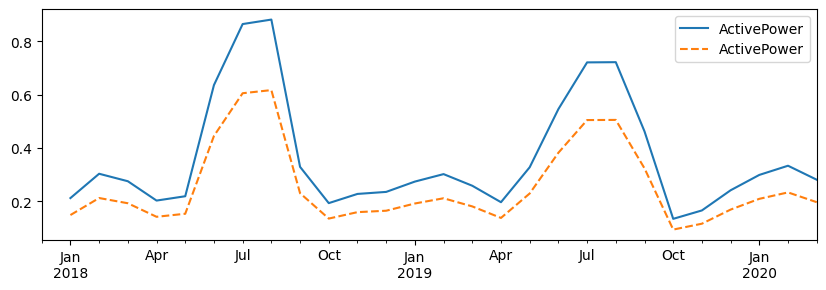

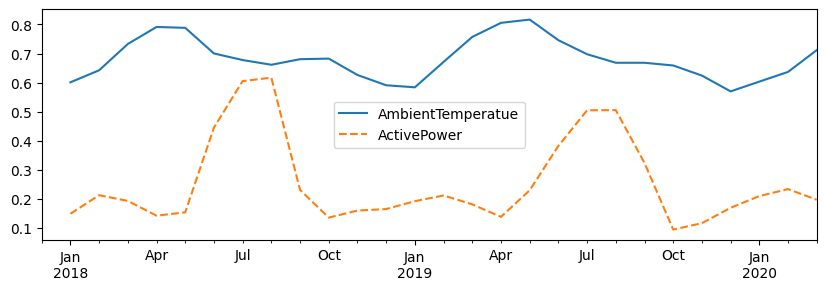

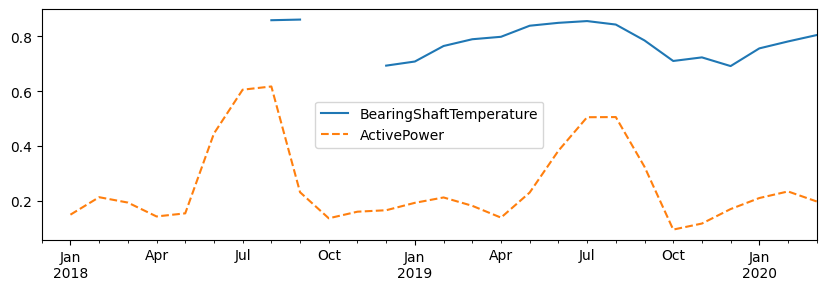

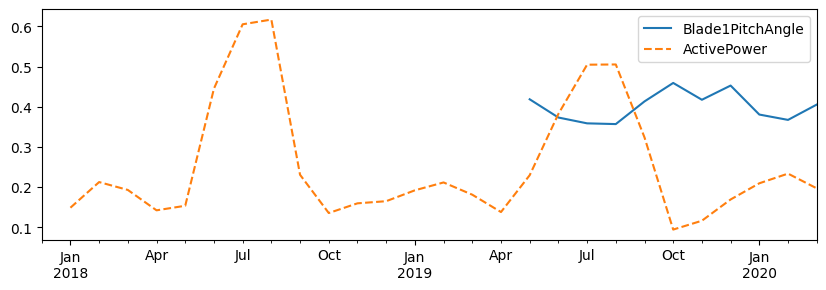

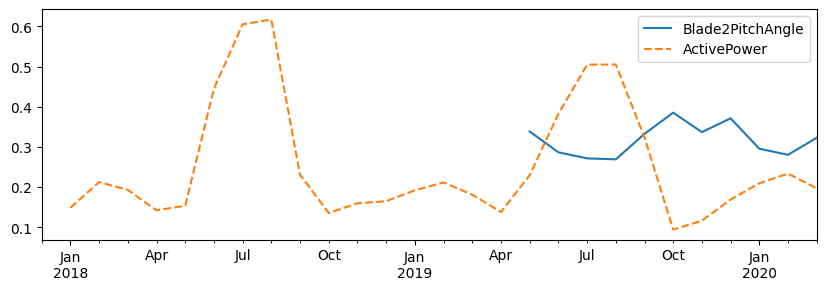

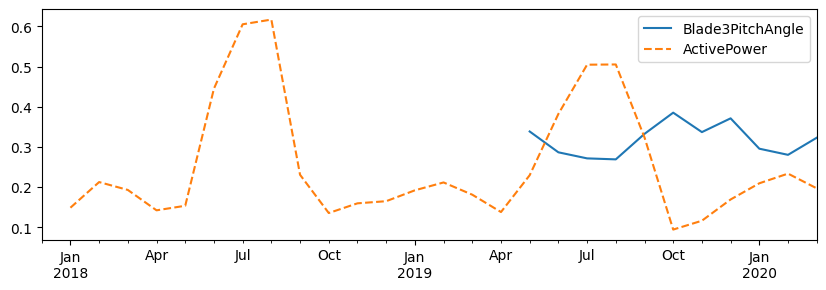

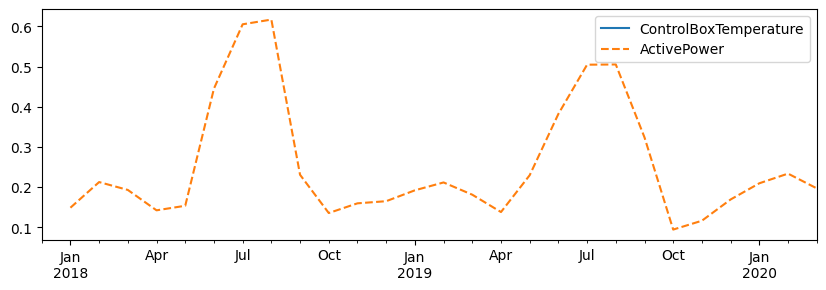

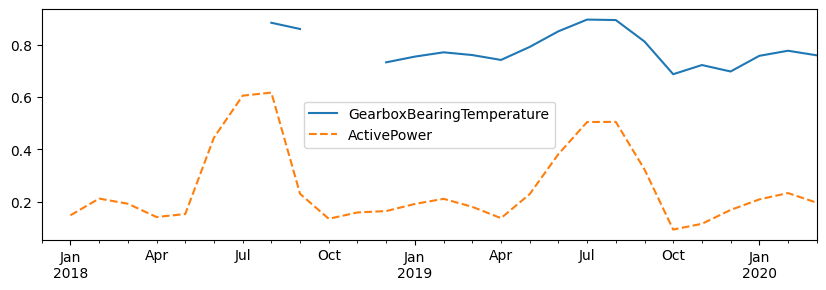

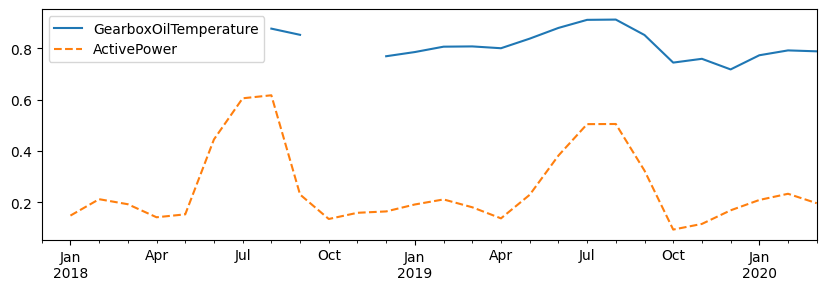

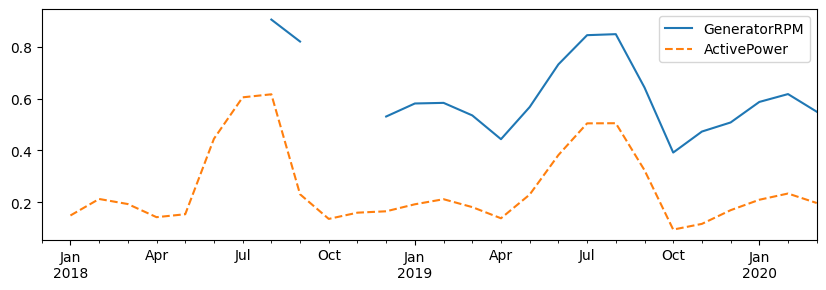

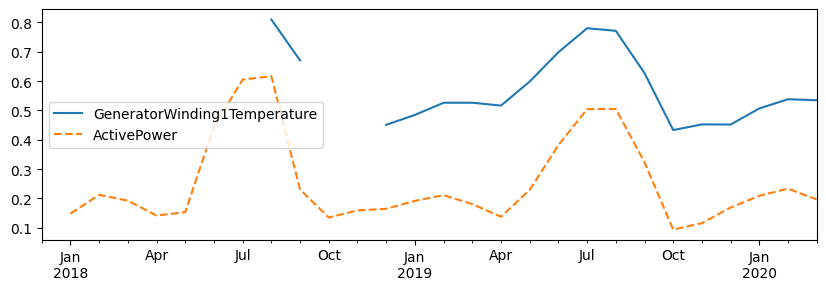

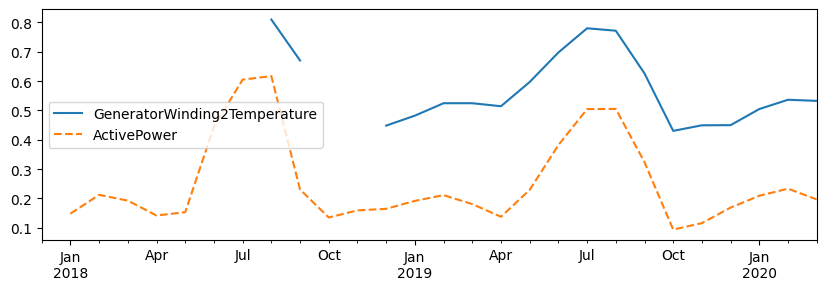

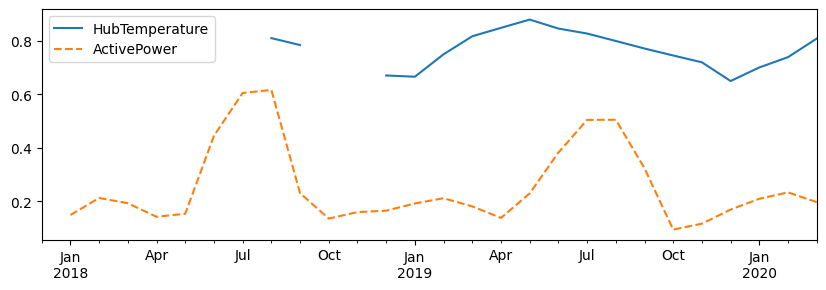

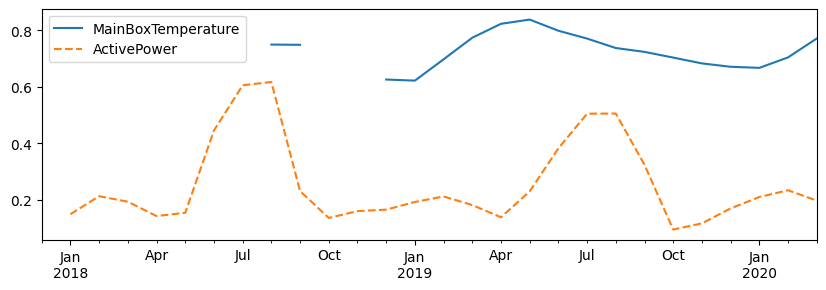

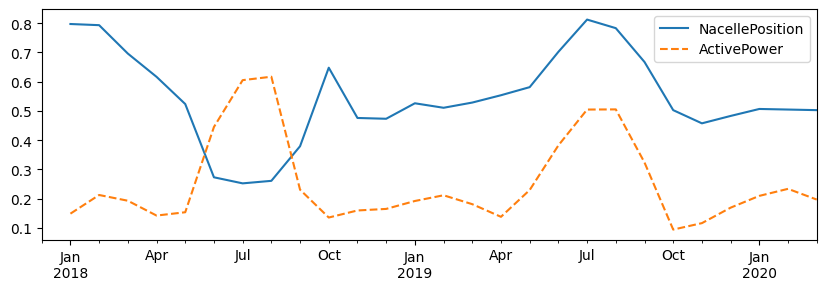

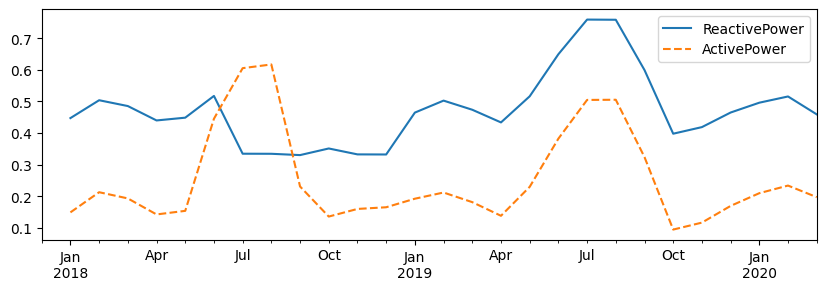

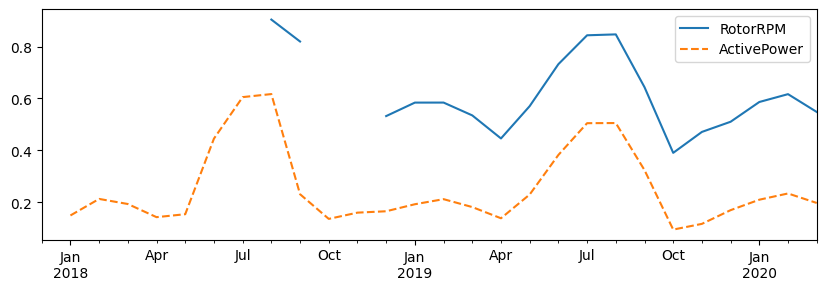

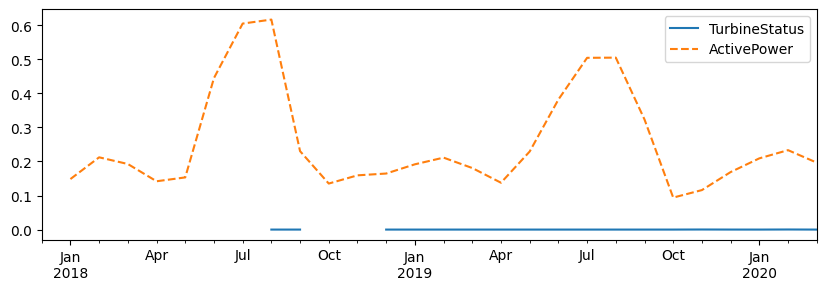

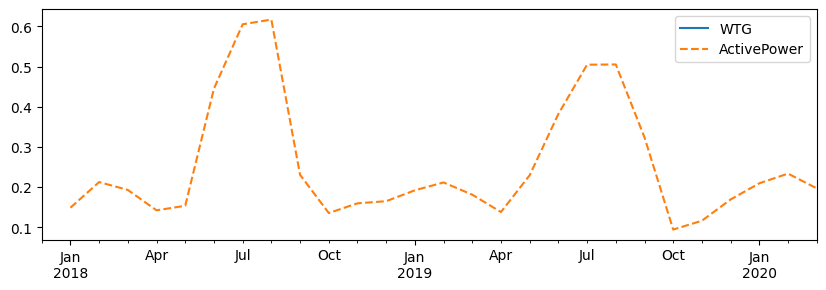

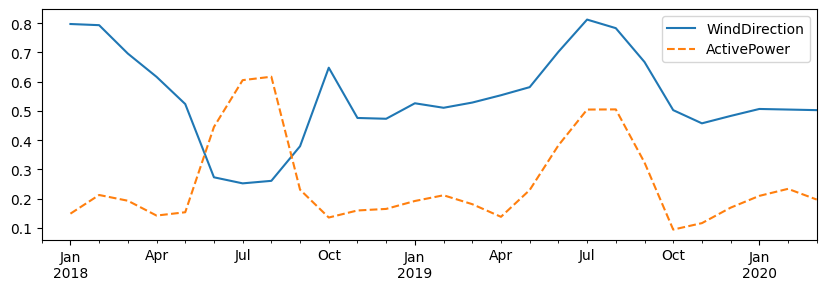

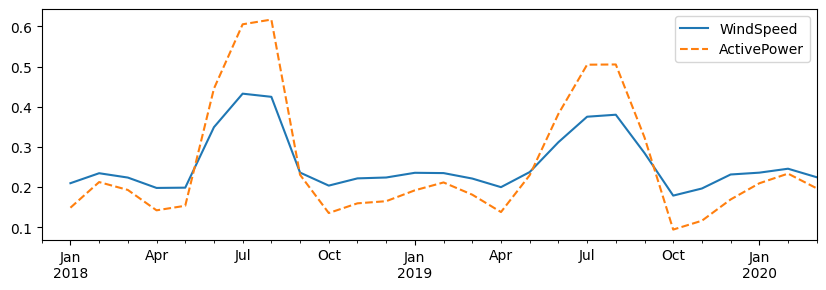

In [ ]:
for i in data:
    plt.figure(figsize=(10, 3))

    # Reamostra os dados da coluna i para médias mensais e plota a série temporal
    d2[i].resample('ME').mean().plot(legend=i)

    # Reamostra os dados de 'ActivePower' (ajustados em escala) para médias mensais e plota a série temporal com linha tracejada
    (d2['ActivePower'] * 0.7).resample('ME').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

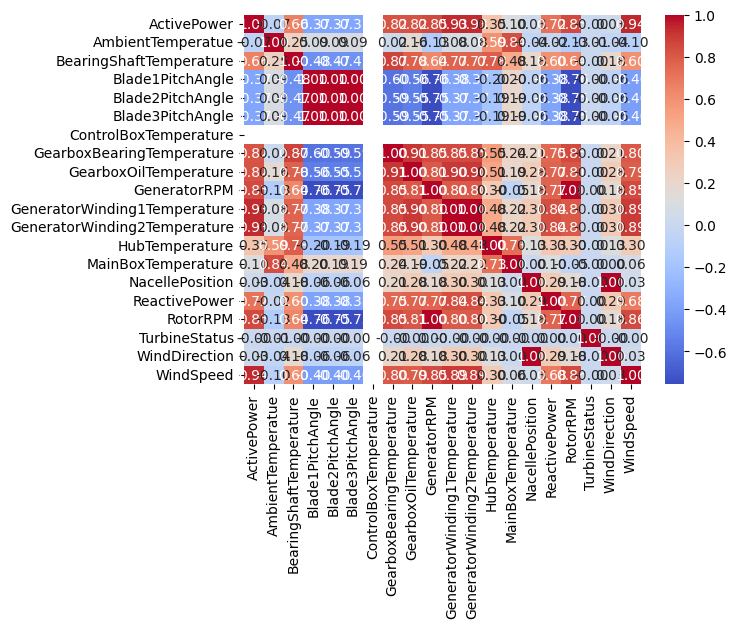

In [ ]:
import seaborn as sns
import math
numeric_data = data.select_dtypes(include=np.number)

sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

ActivePower                     1.000000
WindSpeed                       0.940428
GeneratorWinding2Temperature    0.932563
GeneratorWinding1Temperature    0.931433
GeneratorRPM                    0.849621
RotorRPM                        0.849087
GearboxOilTemperature           0.821916
GearboxBearingTemperature       0.820027
ReactivePower                   0.718388
BearingShaftTemperature         0.656992
HubTemperature                  0.347747
MainBoxTemperature              0.101298
WindDirection                   0.026914
TurbineStatus                  -0.000131
AmbientTemperatue              -0.066685
Blade3PitchAngle               -0.368129
Blade1PitchAngle               -0.369142
ControlBoxTemperature                NaN
dtype: float64


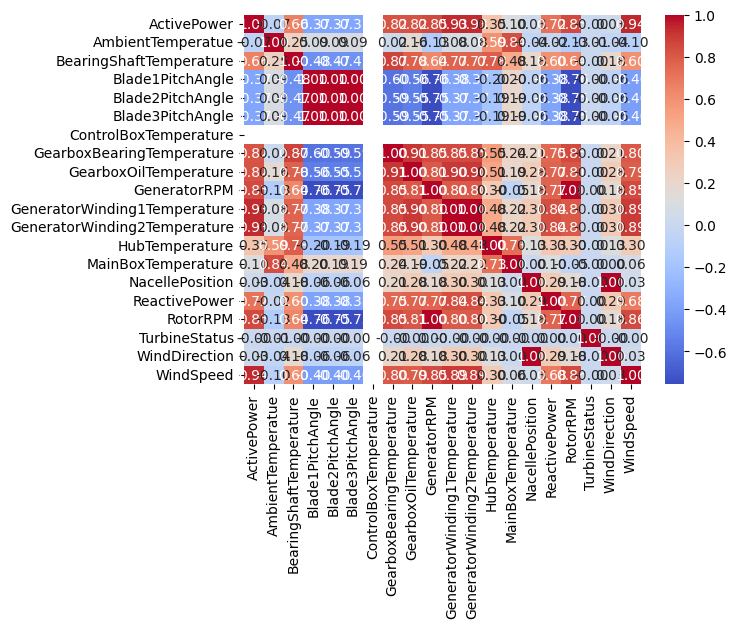

In [ ]:
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlations = numeric_data.corr().unstack().sort_values(ascending=False)

# Display the correlations with 'ActivePower'
print(correlations['ActivePower'].drop_duplicates())

# Create the heatmap
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1126/1126 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 856759.7500 - mean_absolute_error: 719.2430 - val_loss: 838080.5625 - val_mean_absolute_error: 706.1998
Epoch 2/300
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 832744.8750 - mean_absolute_error: 701.3507 - val_loss: 811826.5000 - val_mean_absolute_error: 688.4906
Epoch 3/300
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 809423.0000 - mean_absolute_error: 686.0570 - val_loss: 786585.1250 - val_mean_absolute_error: 671.6149
Epoch 4/300
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 784908.9375 - mean_absolute_error: 669.6415 - val_loss: 762052.1250 - val_mean_absolute_error: 655.3419
Epoch 5/300
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 752374.5000 - mean_absolute_error: 648.7602 - val_loss: 738120.1250 - val_mean_absolute_error: 639.4484
Epoch 6/300
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 729591.0000 - mean_absolute_error: 633.7417 - val_loss: 714858.5625 - val_mean_absolute_error: 623.9836
Epoch 7/3

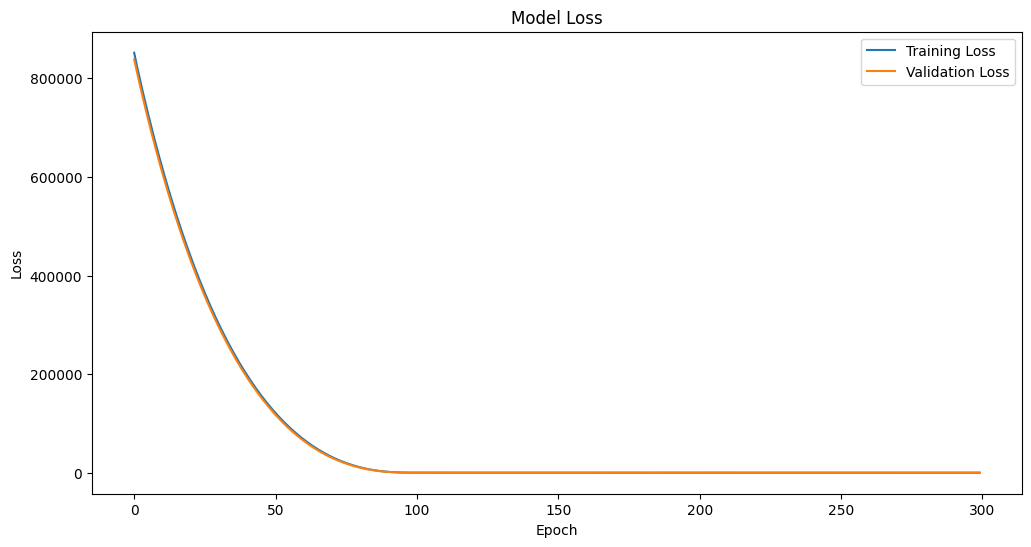

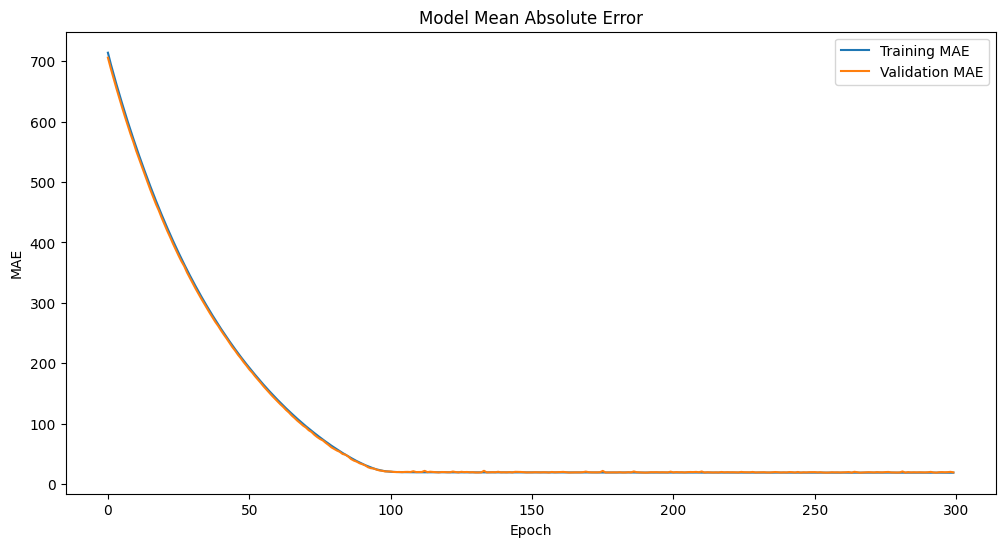

In [ ]:
data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'], index_col=['Unnamed: 0'])
data.drop_duplicates(inplace=True)
# Define the columns to be skipped and the target column
# columns_to_skip = ['Unnamed: 0', 'ControlBoxTemperature', 'WTG']
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar os dados para remover outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Selecionar as features e target
features = ['WindSpeed', 'RotorRPM', 'GeneratorRPM', 'GearboxOilTemperature', 'GearboxBearingTemperature']
X = data[features]
y = data['ActivePower']

# Combinar X e y para facilitar a remoção de outliers
df = pd.concat([X, y], axis=1)

# Remover outliers
df_clean = remove_outliers(df, features)

# Separar novamente as features e o target
X_clean = df_clean[features]
y_clean = df_clean['ActivePower']
# target_column = 'ActivePower'

# # Select the feature set and target variable
# X = data.drop(columns= [target_column]).values  # Features (all rows, selected columns)
# y = data[target_column].values    # Target variable (wind power output)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the improved Feed-Forward Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='tanh'),
    tf.keras.layers.Dense(1,activation='relu' )
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val), batch_size=32)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

# Predict wind power output
y_pred = model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred.flatten()) ** 2)) # Flatten y_pred to 1D
print(f'Test RMSE: {rmse}')

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()
